In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 110.7 MB/s eta 0:00:00


In [3]:
import pennylane as qml
import numpy as np

#Codercise I.1.1

In this codercise, you are given an unnormalized vector

$$
|\psi\rangle=\alpha|0\rangle+\beta|1\rangle, \quad|\alpha|^2+|\beta|^2 \neq 1 .
$$


We can turn this into an equivalent, valid quantum state $\left|\psi^{\prime}\right\rangle$ by normalizing it. Your task is to complete the function normalize_state so that, given $\alpha$ and $\beta$, it normalizes this state to


$$
\left|\psi^{\prime}\right\rangle=\alpha^{\prime}|0\rangle+\beta^{\prime}|1\rangle, \quad\left|\alpha^{\prime}\right|^2+\left|\beta^{\prime}\right|^2=1 .
$$

Hint:

What we must do here is essentially rescale the coefficients of the state vector such that it has unit length. That is, there must be some complex number $\kappa$ such that $\alpha^{\prime}=\kappa \alpha, \beta^{\prime}=\kappa \beta$, and $\left|\alpha^{\prime}\right|^2+\left|\beta^{\prime}\right|^2=1$. Consider how you would do so for a
real-valued vector; then determine how to manipulate the amplitudes in the complex case.

In [4]:
#Codercise I.1.1

# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    norm = np.sqrt( abs(alpha) ** 2 + abs(beta) ** 2 )
    norm_alpha = alpha/norm
    norm_beta = beta/norm

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR
    return np.array ([norm_alpha, norm_beta])
    pass


#Codercise I.1.2

Complete the inner_product function below that computes the inner product between two arbitrary states. Then, use it to verify that $|0\rangle$ and $|1\rangle$ form an orthonormal basis, i.e., the states are normalized and orthogonal.

Example.
Suppose we are given two states

  state_1 = np.array([0.8, 0.6])

  state_2 = np.array([1 / np.sqrt(2), 1j / np.sqrt(2)])

Your function should compute and return the value of the inner product:

 0.56568542-0.42426407j

In [11]:
#Codercise I.1.2

def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################


    # COMPUTE AND RETURN THE INNER PRODUCT

    return np.vdot(state_1,state_2)
    # Return the dot product of two vectors where if the first argument is complex, the complex conjugate of the first argument is used for the calculation of the dot product.

# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


#Codercise I.1.3

Write the function measure_state that takes a quantum state vector as input and simulates the outcomes of an arbitrary number of quantum measurements, i.e., return a list of samples 0 or 1 based on the probabilities given by the input state.

Example.
Suppose we are given the state

  state = np.array([0.8, 0.6])

If we measure a qubit in this state, we'll observe $|0⟩$ 64% of the time, and $|1⟩$ 36% of the time. Therefore, an example set of 10 measurement outcomes might be

[0, 1, 1, 1, 0, 1, 0, 0 ,0 ,0]

Hint.
The function np.random.choice will be helpful here.

In [12]:
#Codercise I.1.3

def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    prob_0 = abs(state[0]) ** 2
    prob_1 = abs(state[1]) ** 2
    outcome = np.random.choice([0,1], size = num_meas, p = [prob_0, prob_1])
    return outcome

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    pass



#Codercise I.1.4

Recall that quantum operations are represented as matrices. To preserve normalization, they must be a special type of matrix called a unitary matrix. For some $2 𝘅 2$ complex-valued unitary matrix $U$ the state of the qubit after an operation is

$$|\psi'\rangle = U |\psi\rangle$$

Let's simulate the process by completing the function apply_u below to apply the provided quantum operation U to an input state.

Example.
Consider the following unitary matrix and qubit state vector:

  U = np.array([[0, 1], [1, 0]])

  state = np.array([0.8, 0.6])

If we apply U to state, we will receive the vector

  np.array([0.6, 0.8])

You can see that the output is still a valid normalized quantum state.

In [13]:
#Codercise I.1.4

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    output_state = np.dot(U, state)
    return output_state

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    pass


#Codercise I.1.5

You may not have realized it, but you now have all the ingredients to write a very simple **quantum simulator** that can simulate the outcome of running quantum algorithms on a single qubit! Let's put everything together.

Use the functions below to simulate a quantum algorithm that does the following:

1. Initialize a qubit in state $|0\rangle$
2. Apply the provided operation $U$
3. Simulate measuring the output state 100 times

You'll have to complete a function for initialization, but we've provided functions for the other two.

In [14]:
#Codercise I.1.5


U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0>
    return np.array([1,0])
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################

    return  measure_state(apply_u(initialize_state()),100)

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass

#Codercise I.2.1

The code below is a quantum function with all the gates from the circuit shown below. However, the gates are out of order! Re-arrange the lines of the function to match the order of operations in the circuit.
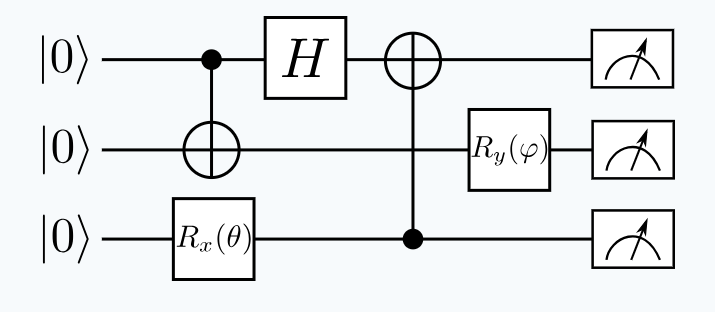

In [15]:
#Codercise I.2.1

def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])



#Codercise I.2.2

Recall that one way in which we can turn our quantum circuits into QNodes is via the qml.QNode function:

    my_qnode = qml.QNode(my_circuit, my_device)

Once a QNode is created, it can be called like a function using the same parameters as the quantum function upon which it's built.

Complete the quantum function in the PennyLane code below to implement the following quantum circuit. Then, construct a QNode using qml.QNode and run the circuit on the provided device.

The mapping between the parameters in the circuit diagram and the parameters of the circuit in the code are θ →  theta, ϕ → phi, and ω → omega.

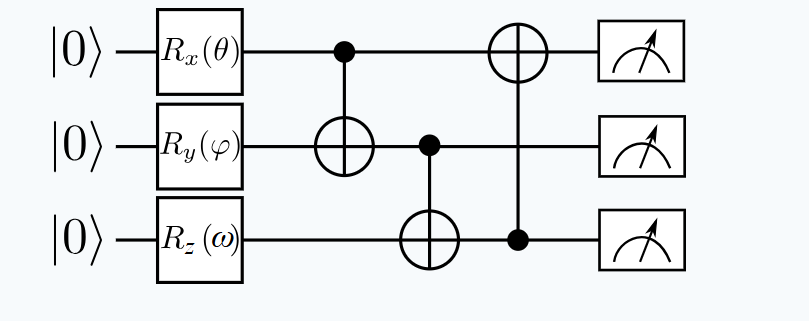

In [16]:
#Codercise I.2.2

# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:

    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)



array([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
       2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03])

#Codercise I.2.3

The second way to construct a QNode in PennyLane is using a **decorator**. Decorating a quantum function with @qml.qnode(dev) will automatically produce a QNode with the same name as your function that can be run on the device dev.

The quantum function below implements the circuit from the previous exercise. Apply a decorator to the quantum function to construct a QNode, then run it using the provided input parameters.

In [18]:
#Codercise I.2.3

dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

@qml.qnode(dev)

def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS

my_circuit(theta, phi, omega)



array([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
       2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03])

#Codercise I.2.4

Remember our circuit from the previous section:
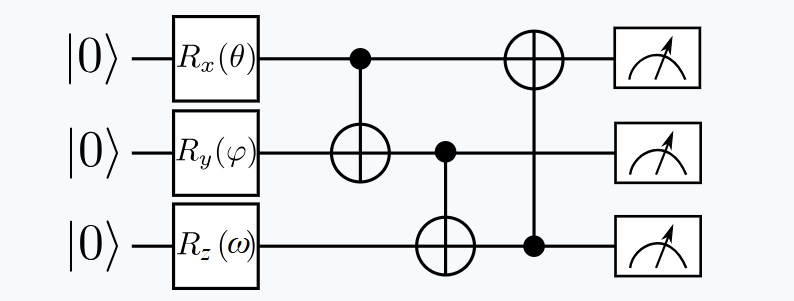

What is the depth of the circuit in the picture above?

In [19]:
#Codercise I.2.4

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4

#Codercise I.3.1

In PennyLane, unitary operations specified by a matrix can be implemented in a quantum circuit using the QubitUnitary operation. QubitUnitary is a parametrized gate, and can be called like so:

    qml.QubitUnitary(U, wires=wire)

Complete the quantum function below to create a circuit that applies $U$ to the qubit and returns its state. (Compare this to the earlier function apply_u that you wrote before - isn't it nice to not have to worry about the matrix arithmetic?)



In [20]:
#Codercise I.3.1

dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################
    qml.QubitUnitary(U, wires=0)

    # USE QubitUnitary TO APPLY U TO THE QUBIT

    # Return the state
    return qml.state()


#Codercise I.3.2

Unitary matrices can be parametrized. A single-qubit unitary operation can be expressed in terms of just three real numbers:

$$
U(\phi, \theta, \omega)=\left(\begin{array}{cc}
e^{-i(\phi+\omega) / 2} \cos (\theta / 2) & -e^{i(\phi-\omega) / 2} \sin (\theta / 2) \\
e^{-i(\phi-\omega) / 2} \sin (\theta / 2) & e^{i(\phi+\omega) / 2} \cos (\theta / 2)
\end{array}\right)
$$


In PennyLane, this parametrized operation is implemented as a gate called Rot. Rot takes three parameters, which are precisely the angles in the formula above:

> qml.Rot(phi, theta, omega, wires=wire)

Apply the Rot operation to a qubit using the input parameters. Then, complete the QNode to return the quantum state vector, using qml.state().

In [21]:
#Codercise I.3.2

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Rot(phi, theta, omega, wires=0)

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()
